In [1]:
import matplotlib.pyplot as plt
import numpy as np

from core import *
import imageio.v3 as iio
from PIL import Image

im = iio.imread('800px-SheppLogan.png')

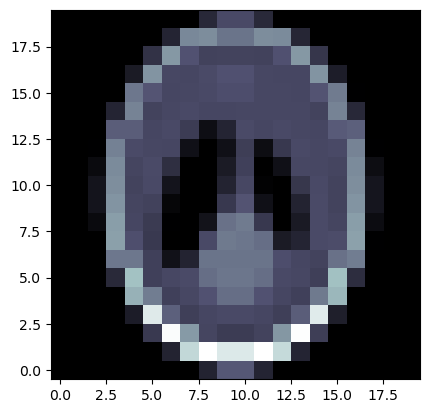

In [2]:
# loading image
new_res = 20

img = Image.fromarray(im).resize((new_res, new_res))
img = np.array(img.convert('L'))
plt.imshow(img, cmap='bone', origin='lower');

In [3]:
params = {
  "no_of_detectors": 20,
  "source_to_object": 100,
  "source_to_detector": 200,
  "size_of_object": 20,
  "no_of_rotations": 20,
  "detector_aperture": 2,
  "resolution": None
}

In [5]:
A = CreateInterceptMatrix(**params).create_intercept_matrix_from_lines()

## Forward Problem

solving the forward problem of obtaining detector readings using image matrix (shepp Logan)

In [6]:
x = img
x.shape

(20, 20)

In [7]:
A.shape

(400, 400)

In [8]:
b = A @ x.flatten()
b

array([0.00000000e+00, 0.00000000e+00, 4.71324958e+01, 7.59604072e+02,
       8.88343258e+02, 9.48960645e+02, 8.01490855e+02, 7.67239746e+02,
       9.01101370e+02, 1.15901449e+03, 1.29501619e+03, 1.01211386e+03,
       8.63269753e+02, 9.49581550e+02, 9.79992058e+02, 8.87341744e+02,
       7.72631582e+02, 5.31494102e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.20361691e+02, 9.11213494e+02,
       9.18615696e+02, 8.18923252e+02, 8.64490246e+02, 9.56524016e+02,
       9.30179329e+02, 1.01695924e+03, 1.04578078e+03, 8.92583805e+02,
       8.66756827e+02, 9.40614913e+02, 8.91611648e+02, 8.85375355e+02,
       7.11892024e+02, 1.52520490e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.81601918e+01, 8.77460753e+02, 9.06697744e+02,
       8.56546803e+02, 8.22767746e+02, 8.85298525e+02, 8.48058230e+02,
       9.77812793e+02, 9.04164506e+02, 7.61332726e+02, 7.67605187e+02,
       7.50719444e+02, 9.10321602e+02, 8.79155966e+02, 7.84077338e+02,
      

## Backward Problem

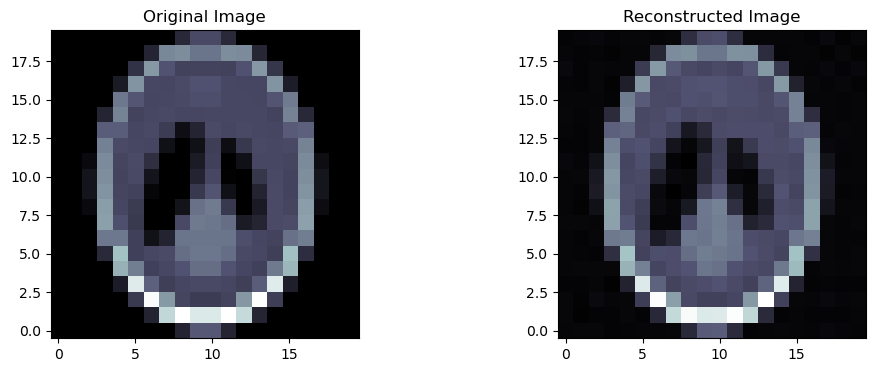

In [9]:
x = SolveEquation(A, b).solve(useLibrary='lstsq')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

reconstructed_img = GenerateImage(x)
reconstructed_img.make_figure(ax=axes[1])
axes[0].imshow(img, origin='lower', cmap='bone')
axes[0].set_title('Original Image')
axes[1].set_title('Reconstructed Image');